In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [2]:
import sklearn

In [3]:
#df = pd.read_csv('/winequality-red.csv') # Load the data
from sklearn.datasets import load_wine

dataset = load_wine()
x_data = dataset.data
y_data = dataset.target

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['quality'] = dataset.target

In [5]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
df.columns[:-1]

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
# The target variable is 'quality'.
Y = df['quality']
X =  df[df.columns[:-1]]

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

[0.05915248 0.00790402 0.00340424 0.00497216 0.00365956 0.
 0.33440397 0.         0.         0.11286384 0.00197866 0.31709242
 0.15456865]


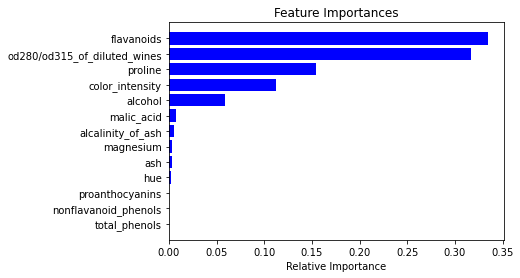

In [8]:
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [15]:
ignore_warning=True
import shap
#rf_shap_values = shap.KernelExplainer(rf.predict,X_test)

In [13]:
import numpy
numpy.__version__

'1.19.2'

In [16]:
model = rf
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(rf_shap_values, X_test)
f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

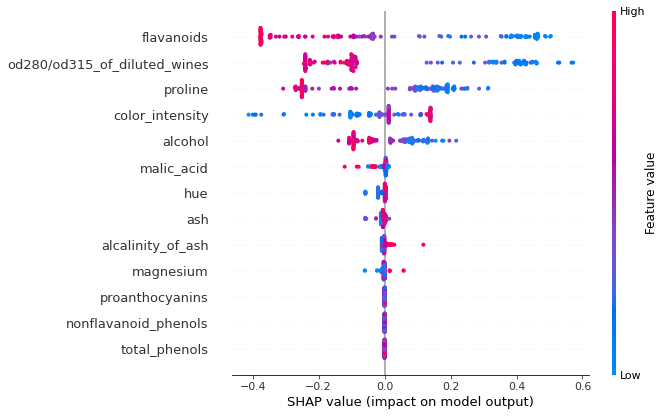

In [17]:
shap.summary_plot(shap_values, 
                  features=X_train, 
                  feature_names=features )